In [1]:
from apriori import Apriori
from helper import GetItemsetFromFile, PrintTimeInfo, SaveDataFrameToHTMLFile, SaveDataFrameToHTMLFile, CreateTripleDataFrame, GetSubsectionOfData, CreatePairDataFrame, CreatePLPlot
from time import time
import pandas as pd
import numpy as np

In [2]:
s_t = time()
retail_data = GetItemsetFromFile("retail.data")
f_t = time()
print("Time taken to read retail data: %.2f seconds" % (f_t - s_t))

Time taken to read retail data: 0.23 seconds


In [3]:
support_values = [0.01, 0.02, 0.05]
split_data_values = [0.2, 0.4, 1]

In [4]:
apri_pair_timings = []
# Perfom Apriori on pairs of data for all support values and split data values
for data_split in split_data_values:
    for support in support_values:
        data = GetSubsectionOfData(retail_data, data_split) # Get % of data
        file_name = "apri-ret-p-"+str(round(data_split*100))+"-" + str(round(support*100))   # Set file name

        s_t = time()    # Start Time
        occ, freq = Apriori(data, support, 2)
        f_t = time()    # End Time
        apri_pair_timings.append((f_t - s_t))
        PrintTimeInfo("Apriori", (data_split * 100), (f_t - s_t), support, "pairs")
        df = CreatePairDataFrame(occ, freq, len(data))
        SaveDataFrameToHTMLFile(df, file_name)
    print("Done running Apriori pairs on %d%% of data" % (data_split * 100)+"\n")

Time taken to complete Apriori on 20% of data using pairs of retail data: 2.77 seconds with support: 1%
Time taken to complete Apriori on 20% of data using pairs of retail data: 1.43 seconds with support: 2%
Time taken to complete Apriori on 20% of data using pairs of retail data: 0.89 seconds with support: 5%
Done running Apriori pairs on 20% of data

Time taken to complete Apriori on 40% of data using pairs of retail data: 5.19 seconds with support: 1%
Time taken to complete Apriori on 40% of data using pairs of retail data: 2.73 seconds with support: 2%
Time taken to complete Apriori on 40% of data using pairs of retail data: 1.78 seconds with support: 5%
Done running Apriori pairs on 40% of data

Time taken to complete Apriori on 100% of data using pairs of retail data: 12.75 seconds with support: 1%
Time taken to complete Apriori on 100% of data using pairs of retail data: 6.65 seconds with support: 2%
Time taken to complete Apriori on 100% of data using pairs of retail data: 4.63

In [6]:
apri_triple_timings = []
# Perfom Apriori on triples of data for all support values and split data values
for data_split in split_data_values:
    for support in support_values:
        data = GetSubsectionOfData(retail_data, data_split) # Get % of data
        file_name = "apri-ret-t-"+str(round(data_split*100))+"-" + str(round(support*100))   # Set file name

        s_t = time()    # Start Time
        freq = Apriori(data, support, 3)
        f_t = time()    # End Time
        apri_triple_timings.append((f_t - s_t))
        PrintTimeInfo("Apriori", (data_split * 100), (f_t - s_t), support, "triples")
        df = CreateTripleDataFrame(freq)
        SaveDataFrameToHTMLFile(df, file_name)
    print("Done running Apriori triples on %d%% of data" % (data_split * 100)+"\n")

Time taken to complete Apriori on 20% of data using triples of retail data: 2.62 seconds with support: 1%
Time taken to complete Apriori on 20% of data using triples of retail data: 1.46 seconds with support: 2%
Time taken to complete Apriori on 20% of data using triples of retail data: 0.88 seconds with support: 5%
Done running Apriori triples on 20% of data

Time taken to complete Apriori on 40% of data using triples of retail data: 6.18 seconds with support: 1%
Time taken to complete Apriori on 40% of data using triples of retail data: 3.14 seconds with support: 2%
Time taken to complete Apriori on 40% of data using triples of retail data: 1.92 seconds with support: 5%
Done running Apriori triples on 40% of data

Time taken to complete Apriori on 100% of data using triples of retail data: 14.40 seconds with support: 1%
Time taken to complete Apriori on 100% of data using triples of retail data: 7.21 seconds with support: 2%
Time taken to complete Apriori on 100% of data using triple

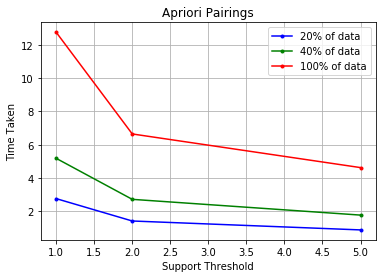

In [7]:
CreatePLPlot(apri_pair_timings, support_values, "Apriori Pairings")

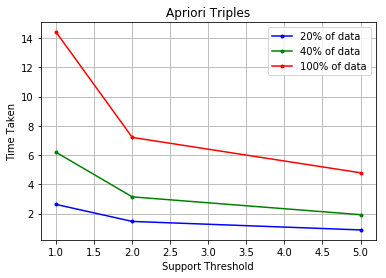

In [8]:
CreatePLPlot(apri_triple_timings, support_values, "Apriori Triples")